# работа с *high-level TensorFlow API*

# загрузка изображений 

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pathlib

imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])

print(*file_list, sep='\n')

cat_dog_images/cat-01.jpg
cat_dog_images/cat-02.jpg
cat_dog_images/cat-03.jpg
cat_dog_images/dog-01.jpg
cat_dog_images/dog-02.jpg
cat_dog_images/dog-03.jpg


Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


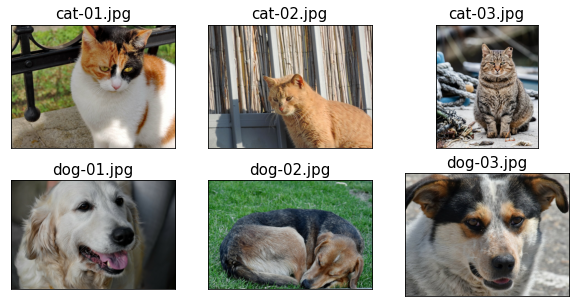

In [3]:
import os

fig = plt.figure(figsize=(10, 5))
for i,file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)

    print('Image shape: ', img.shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)

In [4]:
labels = [1 if 'dog' in os.path.basename(file) else 0
          for file in file_list]
print('Создал метки классов из названий фото: \n\t\t', labels)

ds_files_labels = tf.data.Dataset.from_tensor_slices(
                                 (file_list, labels))

for item in ds_files_labels:
    print(item[0].numpy(), item[1].numpy())

Создал метки классов из названий фото: 
		 [0, 0, 0, 1, 1, 1]
b'cat_dog_images/cat-01.jpg' 0
b'cat_dog_images/cat-02.jpg' 0
b'cat_dog_images/cat-03.jpg' 0
b'cat_dog_images/dog-01.jpg' 1
b'cat_dog_images/dog-02.jpg' 1
b'cat_dog_images/dog-03.jpg' 1


## загрузка + изменение размера

(80, 120, 3) 0
(80, 120, 3) 0
(80, 120, 3) 0
(80, 120, 3) 1
(80, 120, 3) 1
(80, 120, 3) 1


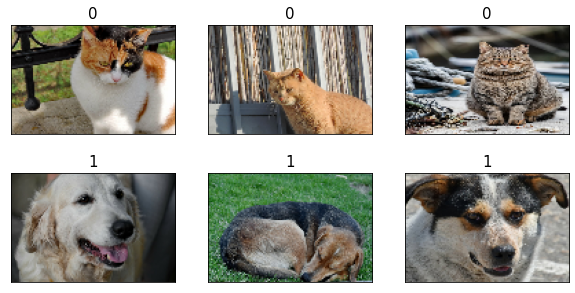

In [5]:
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0
    return image, label

img_width, img_height = 120, 80

ds_images_labels = ds_files_labels.map(load_and_preprocess)

fig = plt.figure(figsize=(10, 5))
for i,example in enumerate(ds_images_labels):
    print(example[0].shape, example[1].numpy())
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title(f'{example[1].numpy()}', size=15)
    

# TF содержит наборы фото
!pip install tensorflow-datasets

In [6]:
import tensorflow_datasets as tfds
print('Количество наборов:',len(tfds.list_builders()))

Количество наборов: 173


## - извлечение набора

In [7]:
celeba_bldr = tfds.builder('celeb_a')

print(celeba_bldr.info.features)

print('\n1', 100*"~", '\n')
print(celeba_bldr.info.features.keys())

print('\n2', 100*"~", '\n')
print(celeba_bldr.info.features['image'])

print('\n3', 100*"~", '\n')
print(celeba_bldr.info.features['attributes'].keys())

print('\n4', 100*"~", '\n')
print(celeba_bldr.info.citation)

FeaturesDict({
    'attributes': FeaturesDict({
        '5_o_Clock_Shadow': tf.bool,
        'Arched_Eyebrows': tf.bool,
        'Attractive': tf.bool,
        'Bags_Under_Eyes': tf.bool,
        'Bald': tf.bool,
        'Bangs': tf.bool,
        'Big_Lips': tf.bool,
        'Big_Nose': tf.bool,
        'Black_Hair': tf.bool,
        'Blond_Hair': tf.bool,
        'Blurry': tf.bool,
        'Brown_Hair': tf.bool,
        'Bushy_Eyebrows': tf.bool,
        'Chubby': tf.bool,
        'Double_Chin': tf.bool,
        'Eyeglasses': tf.bool,
        'Goatee': tf.bool,
        'Gray_Hair': tf.bool,
        'Heavy_Makeup': tf.bool,
        'High_Cheekbones': tf.bool,
        'Male': tf.bool,
        'Mouth_Slightly_Open': tf.bool,
        'Mustache': tf.bool,
        'Narrow_Eyes': tf.bool,
        'No_Beard': tf.bool,
        'Oval_Face': tf.bool,
        'Pale_Skin': tf.bool,
        'Pointy_Nose': tf.bool,
        'Receding_Hairline': tf.bool,
        'Rosy_Cheeks': tf.bool,
        'Sidebu

In [8]:
mnist, mnist_info = tfds.load('mnist', with_info=True,
                              shuffle_files=False)
print(mnist_info)
print(mnist.keys())

tfds.core.DatasetInfo(
    name='mnist',
    version=3.0.1,
    description='The MNIST database of handwritten digits.',
    homepage='http://yann.lecun.com/exdb/mnist/',
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=10),
    }),
    total_num_examples=70000,
    splits={
        'test': 10000,
        'train': 60000,
    },
    supervised_keys=('image', 'label'),
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann. lecun. com/exdb/mnist},
      volume={2},
      year={2010}
    }""",
    redistribution_info=,
)

dict_keys(['test', 'train'])


Размер матриц фото: (10, 28, 28, 1) 
Метки классов: [4 1 0 7 8 1 2 7 1 6]


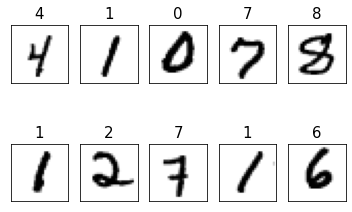

In [9]:
ds_train = mnist['train']
assert isinstance(ds_train, tf.data.Dataset)

ds_train = ds_train.map(lambda item:  (item['image'], item['label']))

ds_train = ds_train.batch(10)
batch = next(iter(ds_train))

print('Размер матриц фото:', batch[0].shape,
      '\nМетки классов:',    batch[1].numpy())

fig = plt.figure(figsize=(6, 4))
for i,(image,label) in enumerate(zip(batch[0], batch[1])):
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(image[:, :, 0], cmap='gray_r')
    ax.set_title(f'{label}', size=15)
    
plt.show()

# TF2 Linear Regression

In [10]:
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1,
                    2.0, 5.0, 6.3, 
                    6.6, 7.4, 8.0, 9.0])

X_train_norm = (X_train - np.mean(X_train))/np.std(X_train)

ds_train_orig = tf.data.Dataset.from_tensor_slices(
               (tf.cast(X_train_norm, tf.float32),
                tf.cast(y_train, tf.float32)))

In [11]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        # определение матрицы весов и векетора смещений
        self.w = tf.Variable(0.0, name='weight')
        self.b = tf.Variable(0.0, name='bias')

    def call(self, x):
        return self.w*x + self.b


model = MyModel()
model.build(input_shape=(None, 1))
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Mean square error.
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))


## testing the function:
yt = tf.convert_to_tensor([1.0])
yp = tf.convert_to_tensor([1.5])
loss_fn(yt, yp).numpy()

0.25

In [13]:
# Optimization process. 
def train(model, inputs, outputs, learning_rate):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    dW, db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate * dW)
    model.b.assign_sub(learning_rate * db)

In [14]:
tf.random.set_seed(123)

num_epochs = 200
log_steps = 100
learning_rate = 0.001
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))


ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)

Ws, bs = [], []

for i, batch in enumerate(ds_train):
    if i >= steps_per_epoch * num_epochs:
        break
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())

    bx, by = batch
    loss_val = loss_fn(model(bx), by)

    train(model, bx, by, learning_rate=learning_rate)
    if i%log_steps==0:
        print('Epoch {:4d} Step {:2d} Loss {:6.4f}'.format(
              int(i/steps_per_epoch), i, loss_val))

Epoch    0 Step  0 Loss 4.0000
Epoch   10 Step 100 Loss 1.8342
Epoch   20 Step 200 Loss 0.5606
Epoch   30 Step 300 Loss 13.8036
Epoch   40 Step 400 Loss 15.3684
Epoch   50 Step 500 Loss 0.2911
Epoch   60 Step 600 Loss 0.0173
Epoch   70 Step 700 Loss 2.5846
Epoch   80 Step 800 Loss 0.0012
Epoch   90 Step 900 Loss 1.7044
Epoch  100 Step 1000 Loss 0.1366
Epoch  110 Step 1100 Loss 1.3546
Epoch  120 Step 1200 Loss 0.6280
Epoch  130 Step 1300 Loss 0.3781
Epoch  140 Step 1400 Loss 0.4150
Epoch  150 Step 1500 Loss 0.1904
Epoch  160 Step 1600 Loss 0.4671
Epoch  170 Step 1700 Loss 0.1831
Epoch  180 Step 1800 Loss 0.1062
Epoch  190 Step 1900 Loss 0.2964


In [15]:
print('Финальные параметры:', model.w.numpy(), model.b.numpy())

Финальные параметры: 2.6577833 4.87935


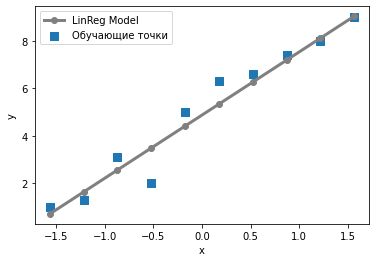

In [16]:
plt.scatter(X_train_norm, y_train,
            marker='s', s=50,label='Обучающие точки')

plt.plot(X_train_norm, 
         model(tf.cast(X_train_norm, dtype=tf.float32)),
         color='gray', marker='o', markersize=6, linewidth=3, label='LinReg Model')
plt.xlabel('x');plt.ylabel('y')
plt.legend();

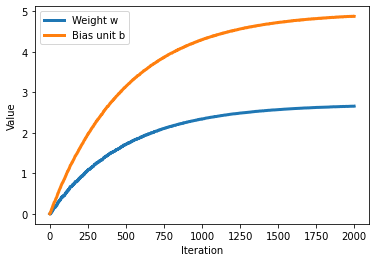

In [23]:
plt.plot(Ws, lw=3); plt.plot(bs, lw=3)
plt.legend(['Weight w', 'Bias unit b'])
plt.xlabel('Iteration');plt.ylabel('Value');

 # Multilayer perceptron with Keras

In [26]:
iris, iris_info = tfds.load('iris', with_info=True)
print(iris_info)

tfds.core.DatasetInfo(
    name='iris',
    version=2.0.0,
    description='This is perhaps the best known database to be found in the pattern recognition
literature. Fisher's paper is a classic in the field and is referenced
frequently to this day. (See Duda & Hart, for example.) The data set contains
3 classes of 50 instances each, where each class refers to a type of iris
plant. One class is linearly separable from the other 2; the latter are NOT
linearly separable from each other.',
    homepage='https://archive.ics.uci.edu/ml/datasets/iris',
    features=FeaturesDict({
        'features': Tensor(shape=(4,), dtype=tf.float32),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=150,
    splits={
        'train': 150,
    },
    supervised_keys=('features', 'label'),
    citation="""@misc{Dua:2019 ,
    author = "Dua, Dheeru and Graff, Casey",
    year = "2017",
    title = "{UCI} Machine Learning Repository",
    url = "http://archiv

In [30]:
tf.random.set_seed(123)
ds_orig = iris['train']
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration=False)

print(next(iter(ds_orig)))
ds_train_orig = ds_orig.take(100)
ds_test = ds_orig.skip(100)

{'features': <tf.Tensor: shape=(4,), dtype=float32, numpy=array([5.7, 2.6, 3.5, 1. ], dtype=float32)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=1>}


In [32]:
ds_train_orig = ds_train_orig.map( lambda x: (x['features'], x['label']))
ds_test       = ds_test.map(lambda x: (x['features'], x['label']))
next(iter(ds_train_orig))

(<tf.Tensor: shape=(4,), dtype=float32, numpy=array([5.7, 2.6, 3.5, 1. ], dtype=float32)>,
 <tf.Tensor: shape=(), dtype=int64, numpy=1>)

In [33]:
iris_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='sigmoid', name='fc1', input_shape=(4,)),
    tf.keras.layers.Dense(3, name='fc2', activation='softmax')])

iris_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 16)                80        
_________________________________________________________________
fc2 (Dense)                  (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [34]:
iris_model.compile(optimizer='adam',
                   loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

In [35]:
num_epochs = 100
training_size = 100
batch_size = 2
steps_per_epoch = np.ceil(training_size / batch_size)

ds_train = ds_train_orig.shuffle(buffer_size=training_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size=batch_size)
ds_train = ds_train.prefetch(buffer_size=1000)


history = iris_model.fit(ds_train, epochs=num_epochs,
                         steps_per_epoch=steps_per_epoch, 
                         verbose=0)

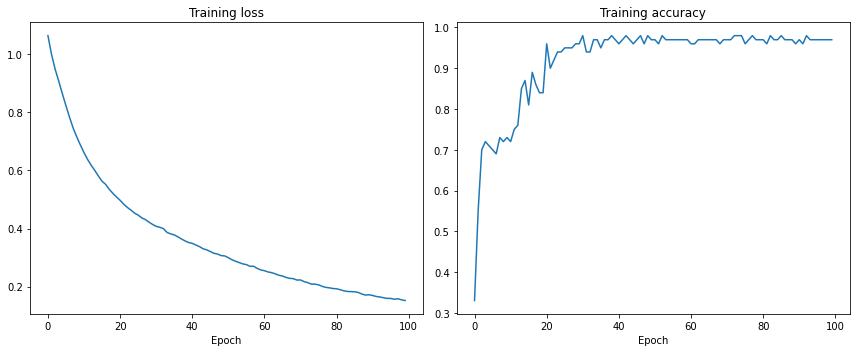

In [41]:
hist = history.history

fig = plt.figure(figsize=(12, 5))
ax  = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'])
ax.set_title('Training loss')
ax.set_xlabel('Epoch')
ax.tick_params(axis='both', which='major')

ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'])
ax.set_title('Training accuracy')
ax.set_xlabel('Epoch')
ax.tick_params(axis='both', which='major')
plt.tight_layout()

In [52]:
results = iris_model.evaluate(ds_test.batch(50), verbose=0)
print('Test loss: {:.3f}   Test Acc.: {:.2%}'.format(*results))

Test loss: 0.159   Test Acc.: 98.00%


# Сохранение и перезагрузка модели

In [54]:
iris_model.save('iris-classifier.h5', 
                overwrite=True,
                include_optimizer=True,
                save_format='h5')

In [55]:
iris_model_new = tf.keras.models.load_model('iris-classifier.h5')
iris_model_new.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 16)                80        
_________________________________________________________________
fc2 (Dense)                  (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [56]:
results = iris_model_new.evaluate(ds_test.batch(50), verbose=0)
print('Test loss: {:.3f}   Test Acc.: {:.2%}'.format(*results))

Test loss: 0.159   Test Acc.: 98.00%


In [67]:
print(iris_model_new.to_json()\
      .replace(', "', '\n"'))

{"class_name": "Sequential"
config": {"name": "sequential"
layers": [{"class_name": "Dense"
config": {"name": "fc1"
trainable": true
batch_input_shape": [null, 4]
dtype": "float32"
units": 16
activation": "sigmoid"
use_bias": true
kernel_initializer": {"class_name": "GlorotUniform"
config": {"seed": null}}
bias_initializer": {"class_name": "Zeros"
config": {}}
kernel_regularizer": null
bias_regularizer": null
activity_regularizer": null
kernel_constraint": null
bias_constraint": null}}, {"class_name": "Dense"
config": {"name": "fc2"
trainable": true
dtype": "float32"
units": 3
activation": "softmax"
use_bias": true
kernel_initializer": {"class_name": "GlorotUniform"
config": {"seed": null}}
bias_initializer": {"class_name": "Zeros"
config": {}}
kernel_regularizer": null
bias_regularizer": null
activity_regularizer": null
kernel_constraint": null
bias_constraint": null}}]
build_input_shape": [null, 4]}
keras_version": "2.3.0-tf"
backend": "tensorflow"}
